#### 무게 찾기
- 목표 : 농어의 길이 피쳐를 사용해서 무게를 예측하기 
  -> 특정 생선을 지정할 예정 (Perch)
- 데이터셋 : fish.csv
- 피쳐/속성 : Length
- 타겟/라벨 : Weight
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : 선형회귀 >>> Data의 분포가 선형의 형태

[1] 데이터 준비 및 피처/타겟 분석

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
DATA_FILE = r"C:\Hwan\ML_Work\D0826\fish.csv"

In [79]:
fishDF = pd.read_csv(DATA_FILE, usecols=[0, 1, 2])
fishDF.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [80]:
mak = (fishDF["Species"] == "Perch")

PerchDF = fishDF[mak]
PerchDF.reset_index(drop = True, inplace = True)
PerchDF

,Species,Weight,Length
0,Perch,5.9,8.4
1,Perch,32.0,13.7
2,Perch,40.0,15.0
3,Perch,51.5,16.2
4,Perch,70.0,17.4
5,Perch,100.0,18.0
6,Perch,78.0,18.7
7,Perch,80.0,19.0
8,Perch,85.0,19.6
9,Perch,85.0,20.0


[1-1] Feature 분석 -> 상관계수 값, 시각화 2개 모두 고려

In [81]:
fishDF = fishDF.drop("Species", axis = "columns").copy()
fishDF.reset_index(drop = True, inplace =True)

In [82]:
fishDF.corr()

,Weight,Length
Weight,1.000000,0.918618
Length,0.918618,1.000000


In [83]:
display(PerchDF.head())
PerchDF.tail()

,Species,Weight,Length
0,Perch,5.9,8.4
1,Perch,32.0,13.7
2,Perch,40.0,15.0
3,Perch,51.5,16.2
4,Perch,70.0,17.4


,Species,Weight,Length
51,Perch,1100.0,42.0
52,Perch,1000.0,43.0
53,Perch,1100.0,43.0
54,Perch,1000.0,43.5
55,Perch,1000.0,44.0


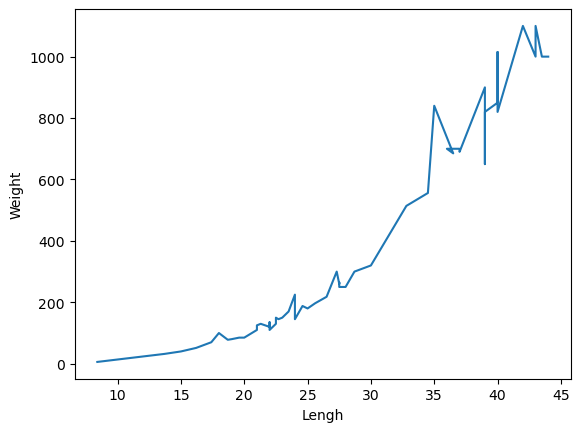

In [84]:
plt.plot(PerchDF["Length"], PerchDF["Weight"])
plt.xlabel("Lengh")
plt.ylabel("Weight")
plt.show()

In [85]:
features = PerchDF[["Length"]]
target = PerchDF[["Weight"]]

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=10)

In [88]:
# 모델생성

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
# 학습모델 생성
model = LinearRegression()

In [91]:
model.fit(X_train, y_train)

LinearRegression()

In [92]:
# 기울기
model.coef_

array([[37.01298297]])

In [93]:
# y 절편
model.intercept_

array([-639.64697722])

In [94]:
# 최적의 k 값 찾기
score = model.score(X_train, y_train)
score

0.9256893774592477

In [96]:
# 성능지표
pre_wieght = model.predict(X_test)

pre_wieght

array([[370.8074579 ],
       [-40.03665308],
       [378.2100545 ],
       [285.67759707],
       [200.54773623],
       [174.63864815],
       [803.85935867],
       [-84.45223265],
       [230.15812261],
       [270.87240388],
       [396.71654598],
       [574.37886425],
       [193.14513964],
       [422.62563406]])